# <font color="orange">In this course we will follow these topics; (as Classification Problems) </font>
<b>
->> Logistic Regression
<br>
->> K-Nearest Neighbors Algorithm
<br>
->> Support Vector Regression - SVR
<br>
->> Artificial neural network
<br>
->> Classification and Regression Trees
<br>
->> Random Forests
<br>
->> Gradient Boosting Machines
<br>
->> XGBoost
<br>
->> LightGBM
<br>
->> CatBoost
</b>

->> Classification is a modelization type that used when dependent variable is consisted of classes or categorical variables. 
<br>
<b>>> Woman or man, sick or not sick, can pay or cant pay </b>
<br>
->> Another type of Supervised Learning -> Regression, Classification
<br>

# <font color="orange">Logistic Regression</font>
<b><font color="purple">->> Our main aim is that generate a model which states a relationship between independent and dependent variables.</font></b>
<br>
->> Logistic Regression can be thought as an adapted version of Multiple Linear Regression's classification problems, but it has some differences.
<br>
->> Dependent variable is consisted of categorical variables
<br>
->> Logistic Regression takes its name from logit transformation.
<br>
->> The hypothesis which are needed to applying on Linear Regression don't necessary in here, so it makes Logistic Regression flexible.
<br>
->> The probability of occurance of depentdent variables's value, that is defined as 1, is calculated. Thus, We don't interest that dependent value, what  value it will take.
<br>
->> By Logistic Function, the producted values are between 0-1.
<img src="./used_images/logistic.png"  width="500" height="500">
<br>
<b><font color="purple">->> How to Find These Coefficients ?</font></b>
<br>
->> As we remember from the regression, we tried to find the coefficients that minimize the difference between the squares of the dependent and independent variables. In here, we use similar methods to find these coefficients.
<img src="./used_images/logistic2.png"  width="500" height="500">
<br>
### <font color="red">Logistic Regression Model and Prediction</font>

In [17]:
# The all functions that we will use in this work
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix,roc_auc_score,roc_curve, classification_report
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore",category=FutureWarning)

In [18]:
"""
    Let's assume that we are working as a data scientist at a hospital, we are asked to develop a product which predicts
    the patient is diabetic or not. We have some analysis about patient or some informations about his/her sickness, we want to 
    create a model which predicts the patient is diabetics or not when we enter some information about that patient. At the end
    of this work, the hospital can use this as a artifical intelligence product which predicts the patient's situation.

"""

# Here, we try to predict Outcome value 
df = pd.read_csv("./csv_files/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [21]:
# defining dependent and independent values
y=df["Outcome"]
X=df.drop(columns="Outcome",axis=1)
""" 
    "X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size=0.25) normally we do this,
    to understand better, we didnt do here.
"""

' \n    "X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size=0.25) normally we do this,\n    to understand better, we didnt do here.\n'

In [22]:
loc_model= LogisticRegression(solver="liblinear").fit(X,y)
print(loc_model.intercept_)
print(loc_model.coef_)

[-5.88679617]
[[ 1.16994476e-01  2.83733435e-02 -1.68981359e-02  7.55145090e-04
  -6.41407258e-04  5.97201268e-02  6.76128123e-01  7.23498971e-03]]


In [23]:
predicted=loc_model.predict(X)
predicted[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [24]:
y[0:10] # actual values

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [25]:
# To get success rate of model we can use these functions.
print(confusion_matrix(y,predicted))
print(accuracy_score(y,predicted))


[[448  52]
 [121 147]]
0.7747395833333334


In [26]:
print(classification_report(y,predicted))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [27]:
# Gives propability of predictions
loc_model.predict_proba(X)[0:5]

array([[0.3505852 , 0.6494148 ],
       [0.91692518, 0.08307482],
       [0.22489628, 0.77510372],
       [0.92127453, 0.07872547],
       [0.16759435, 0.83240565]])

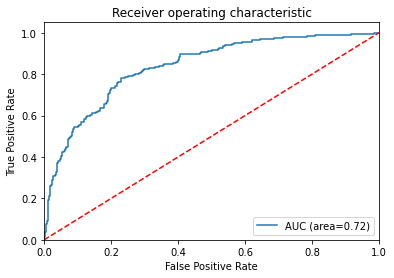

In [28]:
# We can visualize ROC Curve

roc_auc=roc_auc_score(y,loc_model.predict(X))
fpr,tpr,thresholds = roc_curve(y,loc_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()



### <font color="red">Logistic Regression Model Tuning (Model Validation)</font>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)


In [30]:
log_cv_model=LogisticRegression(solver="liblinear").fit(X_train,y_train)

In [31]:
predicted=log_cv_model.predict(X_test)
# To get model score, if score is high it means our classification is successful
accuracy_score(y_test,predicted)

0.7532467532467533

In [32]:
# To validation of model, we can use k fold cross validation
cross_val_score(log_model,X_test,y_test,cv=10) # Calculated 10 test error


array([0.79166667, 0.82608696, 0.73913043, 0.82608696, 0.73913043,
       0.91304348, 0.73913043, 0.65217391, 0.65217391, 0.82608696])

In [33]:
print(cross_val_score(log_model,X_test,y_test,cv=10).mean())

0.7704710144927536


# <font color="orange">K Nearest Neighbors</font>
->> The prediction is done to observations similarities.
### <font color="red">K Nearest Neighbors Model and Prediction</font>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [35]:
df=pd.read_csv("./csv_files/diabetes.csv")
y=df["Outcome"]
X=df.drop(columns=["Outcome"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [36]:
knn_model=KNeighborsClassifier().fit(X_train,y_train)

In [37]:
predicted=knn_model.predict(X_test)

In [38]:
print(accuracy_score(y_test,predicted))
print(classification_report(y_test,predicted))

0.6883116883116883
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### <font color="red">K Nearest Neighbors Model Tuning</font>

In [39]:
# changing this parameter n_neighbors

knn_model=KNeighborsClassifier()
knn_params={"n_neighbors":np.arange(1,50)}
tuned_model=GridSearchCV(knn_model,param_grid=knn_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


In [40]:
print(tuned_model.best_params_)
print(tuned_model.best_score_)
print(tuned_model.best_estimator_)

{'n_neighbors': 11}
0.748637316561845
KNeighborsClassifier(n_neighbors=11)


In [41]:
# final model
knn_final_model=KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
predicted=knn_final_model.predict(X_test)
accuracy_score(y_test,predicted)

0.7316017316017316

In [42]:
# Other way of getting score, more practical 
print(knn_final_model.score(X_test,y_test))

0.7316017316017316


# <font color="orange">Support Vector Machines</font>
->> The aim is finding hyper-plane which makes optimum the differences between two classes.
<br>
<img src="./used_images/svm.png" width="400" height="400">
<br>
->> Our aim is separating two classes, so we put a marging and makes the distance maximum between them. We do this by hyper-plane and hyper plane means that is 2d or 3d line.
<br>
->> <b><font color="purple"> What does support vector machines mean ?</font></b>
<br>
->> The Support Vector Machines mean, the dots that determine the direction and distance of margin, as you can see as black dots on the image, called as support points, hard or soft calculations are used.
<br>
->> In real life, sometimes this form cannot be stated like this, cannot be linear or when dataset have more dimension, sometimes we are needed to use non-lnear methods.
<br>
## <font color="purple"> Non-Linear Support Vector Machine</font>
<img src="./used_images/non-linear.png" width="600" height="600">
<br>
->> When we want to split two classes, as you can see on the first image, if we use linear splitting methods like hard  and soft margins, there can be remaining parts.
<br>
->> To avoid this situation or to do, we need to increase the dimension of dataset likse second image.
<br>
->> <b><font color="purple"> How to do ?</font></b>
<br>
->> By Kernel Trick, we have radial basis method and this method has sigma -> σ (standart deviation, variance -> σ2) and mu -> µ (mean), when this parameters are changed, we have an opportunity to change observations or the slope.

### <font color="red">Support Vector Machines Model and Prediction</font>

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,roc_auc_score,roc_curve,classification_report,accuracy_score
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings("ignore")

In [44]:
df=pd.read_csv("./csv_files/diabetes.csv")
y=df["Outcome"]
X=df.drop(columns=["Outcome"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [45]:
svm_model=SVC(kernel="linear").fit(X_train,y_train) #to observe linear model, default is non linear -> rbf
predicted=svm_model.predict(X_test)
accuracy_score(y_test,predicted)  # First test error withour tuning

0.7445887445887446

### <font color="red">Support Vector Machines Model Tuning</font>

In [46]:
# C is penalty parameter, rbf is radial basis function
svm_model=SVC()
svm_params={"C":np.arange(1,10),"kernel":["linear","rbf"]}

In [47]:
svm_cv_model=GridSearchCV(svm_model,param_grid=svm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [48]:
print(svm_cv_model.best_params_)
print(svm_cv_model.best_score_)
print(svm_cv_model.best_estimator_)

{'C': 2, 'kernel': 'linear'}
0.7839044652128765
SVC(C=2, kernel='linear')


In [50]:
# final model

svc_final_model=SVC(C=1,kernel="linear").fit(X_train,y_train)
predicted=svc_final_model.predict(X_test)
accuracy_score(y_test,predicted)
"""
    if the problem is getting complex or we have a complex problem, 
    big dataset, to use non-linear methods and tree based methods would be better
""" 

0.7445887445887446

# <font color="orange">Artifical Neural Networks</font>
->> The main aim is that reaching the coefficients which can predict minimum error.
<br>
<img src="./used_images/ann.png" width="600" height="600">
<br>
->> Here, logic is same with regression , but there is little difference on activation function side. 
<br>
->> On Activation Function, we can use different activation functions like sigmoid, it gives a probabilit value between 1 and 0.
<br>
->> Our aim is reaching weights or coefficients which are making minimum error that the difference between dependent and independent variables.
<br>
### <font color="red">Artifical Neural Networks Model and Prediction</font>

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler,scale
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,roc_curve,roc_auc_score,classification_report
from warnings import filterwarnings
filterwarnings("ignore")

In [153]:
df=pd.read_csv("./csv_files/diabetes.csv")
y=df["Outcome"]
X=df.drop(columns=["Outcome"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [154]:
mlpc_model=MLPClassifier().fit(X_train,y_train)
predicted=mlpc_model.predict(X_test)
# print(mlpc_model.coefs_) to print coefs of model
print(accuracy_score(y_test,predicted))

0.7359307359307359


In [54]:
# hidden_layer_sizez, activation, solver -> large datasets set adam, otherwise lbfgs, alpha is penalty parameter

### <font color="red">Artifical Neural Networks Model Tuning</font>

In [55]:
# (100,100) means that the hidden layer consists of 2 layer as 100 and 100

mlpc_model=MLPClassifier()
mlpc_parameter={"hidden_layer_sizes":[(10,10),(100,100,100),(100,100),(3,5)],
               "activation":["logistic"],
               "solver":["lbfgs"],
               "alpha":[1,5,0.0001,0.005,0.03,0.01,0.1]}

mlpc_cv_model=GridSearchCV(mlpc_model,param_grid=mlpc_parameter,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [56]:
print(mlpc_cv_model.best_params_)
print(mlpc_cv_model.best_estimator_)


{'activation': 'logistic', 'alpha': 5, 'hidden_layer_sizes': (100, 100), 'solver': 'lbfgs'}
MLPClassifier(activation='logistic', alpha=5, hidden_layer_sizes=(100, 100),
              solver='lbfgs')


In [57]:
# final model for logistic func

mlp_final_model=MLPClassifier(hidden_layer_sizes=(100,100),activation="logistic",alpha=5,solver="lbfgs").fit(X_train,y_train)
predicted=mlp_final_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7272727272727273


#### <font color="purple">For Relu Func</font>

In [58]:
# lets make for relu func

mlpc_model=MLPClassifier()
mlpc_parameter={"hidden_layer_sizes":[(10,10),(100,100,100),(100,100),(3,5)],
               "activation":["relu"],
               "solver":["lbfgs"],
               "alpha":[1,5,0.0001,0.005,0.03,0.01,0.1]}

mlpc_cv_model=GridSearchCV(mlpc_model,param_grid=mlpc_parameter,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [59]:
print(mlpc_cv_model.best_params_)
print(mlpc_cv_model.best_estimator_)


{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'solver': 'lbfgs'}
MLPClassifier(hidden_layer_sizes=(10, 10), solver='lbfgs')


In [60]:
# final model for relu func

final_model=MLPClassifier(hidden_layer_sizes=(100,100),activation="logistic",alpha=5,solver="lbfgs").fit(X_train,y_train)
predicted=final_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7316017316017316


### <font color="purple">Variable Transformation</font>
->> For artifical neural networks, variable transormation is important, if we do variable standardization, machine learning algorithms tend to have more performance because some outliers or similar situatins can be removed after standardization process.

In [155]:
df=pd.read_csv("./csv_files/diabetes.csv")
y=df["Outcome"]
X=df.drop(columns=["Outcome"],axis=1)


In [156]:
# Scaling for Training Dataset
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

# We need to do same process for Test Dataset

scaler.fit(X_test)
X_test=scaler.transform(X_test)


In [157]:
mlpc_model=MLPClassifier()
mlpc_parameter={"hidden_layer_sizes":[(10,10),(100,100,100),(100,100),(3,5)],
               "activation":["logistic"],
               "solver":["lbfgs"],
               "alpha":[1,5,0.0001,0.005,0.03,0.01,0.1]}

mlpc_cv_model=GridSearchCV(mlpc_model,param_grid=mlpc_parameter,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [158]:
print(mlpc_cv_model.best_params_)
print(mlpc_cv_model.best_estimator_)


{'activation': 'logistic', 'alpha': 1, 'hidden_layer_sizes': (3, 5), 'solver': 'lbfgs'}
MLPClassifier(activation='logistic', alpha=1, hidden_layer_sizes=(3, 5),
              solver='lbfgs')


In [159]:
mlp_final_model=MLPClassifier(hidden_layer_sizes=(100,100),activation="logistic",alpha=5,solver="lbfgs").fit(X_train,y_train)
predicted=mlp_final_model.predict(X_test)
print(accuracy_score(y_test,predicted))

# as we can see accuracy score is increased, so in artifical intelligcend

0.7575757575757576


### <font color="purple">As we can see, our accuracy score has increased. In conlusion, we need to use "RELU" activation function if we have a regression problem, if we have a classification problem, we use "LOGISTIC" activation function. Also, alpha, hidden_layer_size, and solver parameters need to set. Lastly, in artifical neural network problems, we need to scale our data. </font>

# <font color="orange">Classification and Regression Trees</font>
->> The aim is transforming complex structures to simple decision structures. It means, heterogenous datasets are splitted subsets to determined a target variables.
<br>
->><b><font color="purple"> To splitting data, Gini Impurity, Information Gain and Chi-Square are used.</font></b>

### <font color="red">Classification and Regression Trees Model and Prediction</font>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier

In [67]:
df=pd.read_csv("./csv_files/diabetes.csv")
y=df["Outcome"]
X=df.drop(columns=["Outcome"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [68]:
cart_model=DecisionTreeClassifier().fit(X_train,y_train)
predicted=cart_model.predict(X_test)
print(accuracy_score(y_test,predicted)) # first score withour optimization, tune.

0.6796536796536796


### <font color="red">Classification and Regression Trees Model Tuning</font>

In [71]:
cart_model=DecisionTreeClassifier()
cart_params={"max_depth":[2,3,5,8,10],"min_samples_split":[2,3,5,10,20,50]}
cartcv_model=GridSearchCV(cart_model,param_grid=cart_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [72]:
print(cartcv_model.best_params_)
print(cartcv_model.best_estimator_)

{'max_depth': 5, 'min_samples_split': 20}
DecisionTreeClassifier(max_depth=5, min_samples_split=20)


In [73]:
# final_model
cart_final_model=DecisionTreeClassifier(max_depth=5,min_samples_split=20).fit(X_train,y_train)
predicted=cart_final_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7532467532467533


# <font color="orange">Random Forests</font>
->> Random Forests are based on evaluation of gathered trees which are generated by more than one decision trees.
<br>
->> Bagging is a special case of Random Forest, bagging is based on bootstrap, bootstrapping is the method of randomly creating samples of data out of a population with replacement to estimate a population parameter.

### <font color="red">Random Forests Model and Prediction</font>

In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score,mean_squared_error,roc_auc_score,roc_curve,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier


In [75]:
df=pd.read_csv("./csv_files/diabetes.csv")
y=df["Outcome"]
X=df.drop(columns=["Outcome"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [76]:
model=RandomForestClassifier().fit(X_train,y_train)
predicted=model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7532467532467533


### <font color="red">Random Forests Model Tuning</font>

In [77]:
#important paramters are n_estimators, min_samples_split, max_depth,max_features -> states the number of variables while splitting

# if tree branches more, it can cause overfitting, the branching period needs to be controlled
model=RandomForestClassifier()
model_param={"n_estimators":[100,200,500,1000],
             "max_features":[3,5,7,8],
             "min_samples_split":[2,5,10,20]
             }
model_cv=GridSearchCV(model,param_grid=model_param,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [78]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)

{'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_features=7)


In [79]:
# final model
rf_final_model=RandomForestClassifier(n_estimators=200,max_features=5,min_samples_split=2).fit(X_train,y_train)
predicted=rf_final_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7316017316017316


### <font color="purple">Variable Importance Levels</font>

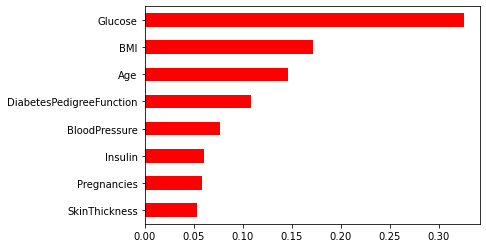

In [80]:
importance = pd.DataFrame({"importance":rf_final_model.feature_importances_},index=X_train.columns)

importance.sort_values(by="importance",ascending=True).plot(kind="barh",color="r");
plt.gca().legend_=None

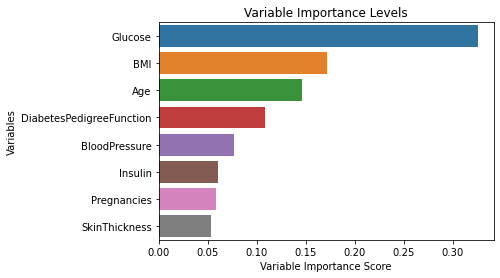

In [81]:
new_importance = pd.DataFrame(rf_final_model.feature_importances_, index=X_train.columns,columns=["importance"]).sort_values(by="importance",ascending=False)

sns.barplot(data=new_importance,x=new_importance["importance"],y=new_importance.index)
plt.xlabel("Variable Importance Score")
plt.ylabel("Variables")
plt.title("Variable Importance Levels")
plt.show();

# <font color="orange">Gradient Boosting Machines</font>
->> The generalized version of AdaBoost.
<br>
->> Boosting method/s is an idea based on gathering weak learners together, revealing strong learners. 
<br>
->> Bad prediction is a high  result of mean squared error of real and predicted values . The trees, which are predicting bad, are weak predictors.
<br>
->> This idea is suggested on 1990 but nobody actualized this idea.
<br>
->> Adaptive Boosting (AdaBoost) is an algorithm that aims to gather weak classifiers together, and create a strong classifier.
<br>
->> Gradient boosting creates a series of models in the form of a single predictive model.
<br>
->> The model, inside of the series, is generated on (fit)  previous model's prediction outliers/errors (residuals).
<br>
->> Gradient Boosting Machines (GBM) uses Gradient Descent Algorithm.
<br>
->> Gradient Boosting can use base learner types like (Trees, linear terms, splines, etc..).
<br>
->> Cost and Link functions can be modified.
<br>
->> GBM consists of Boosting + Gradient Descent.
### <font color="red">Gradient Boosting Machines Model and Prediction</font>

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,roc_auc_score,roc_curve,classification_report,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
df=pd.read_csv("./csv_files/diabetes.csv")
y=df["Outcome"]
X=df.drop(columns=["Outcome"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [84]:
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)
predicted=gbm_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7489177489177489


### <font color="red">Gradient Boosting Machines Model Tuning</font>

In [85]:
# Our aim is finding the difference between real and predicted values, and trying to avoid overfitting.
# n_estimators, learning_rate, loss, min_samples_split, max_depth, subsample can be changed

gbm_model=GradientBoostingClassifier()
gbm_params={"learning_rate":[0.1,0.01,0.001,0.05],
           "n_estimators":[100,300,500,1000],
           "max_depth":[2,3,5,8]}
gbm_cv_model=GridSearchCV(gbm_model,
                          param_grid=gbm_params
                          ,cv=10,
                          n_jobs=-1,
                          verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [86]:
print(gbm_cv_model.best_params_)
print(gbm_cv_model.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500)


In [87]:
# final model

gbm_final_model=GradientBoostingClassifier(n_estimators=300,max_depth=5,learning_rate=0.01).fit(X_train,y_train)
predicted=gbm_final_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7445887445887446


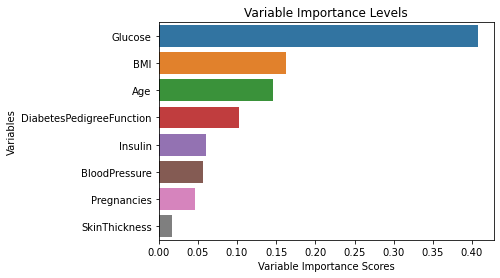

In [88]:
# Let's look variable importance

importance=pd.DataFrame({"variable_importance":gbm_final_model.feature_importances_},index=X_train.columns).sort_values(by="variable_importance",ascending=False)

sns.barplot(data=importance,x=importance["variable_importance"],y=importance.index)
plt.xlabel("Variable Importance Scores")
plt.ylabel("Variables")
plt.title("Variable Importance Levels");

# <font color="orange">Extreme Gradient Boosting (XGBoost) </font>
->> XGBoost is an another optimized case of GBM, that can be integrated to other platforms, scaled, and it is used to increase the speed and performance of GBM.
<br>
->> Can be used in Python, R , Hadoop, Scala and Julia.
<br>
->> Can be Scaled
<br>
->> Fast
<br>
->> High Prediction Rate
<br>
->> It has proved its success in many kaggle competetions.
### <font color="red">Extreme Gradient Boosting (XGBoost) Model and Prediction</font>

In [89]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from xgboost import XGBClassifier

In [174]:
df=pd.read_csv("./csv_files/diabetes.csv")
y=df["Outcome"]
X=df.drop(columns=["Outcome"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [91]:
xgb_model=XGBClassifier().fit(X_train,y_train)
predicted=xgb_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7359307359307359


### <font color="red">Extreme Gradient Boosting (XGBoost) Model Tuning</font>

In [92]:
xgb_model=XGBClassifier()
xgb_params={"n_estimators":[100,500,1000],
            "max_depth":[3,5,7],
            "learning_rate":[0.1,0.01,0.001],
            "subsample":[0.6,0.8,1]
           }
xgb_cv_model=GridSearchCV(xgb_model,param_grid=xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [93]:
print(xgb_cv_model.best_estimator_)
print(xgb_cv_model.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}


In [94]:
# final model

xgb_final_model = XGBClassifier(n_estimators=500,max_depth=7,learning_rate=0.001,subsample=0.6).fit(X_train,y_train)
predicted = xgb_final_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7575757575757576


In [95]:
# Variable importance

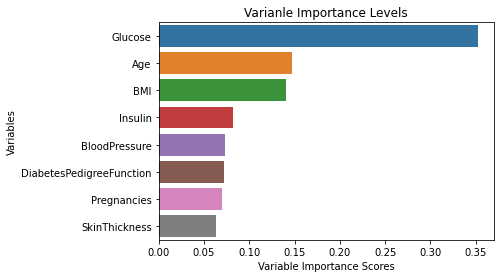

In [96]:
importance = pd.DataFrame({"variable_scores":xgb_final_model.feature_importances_},index=X_train.columns).sort_values(by="variable_scores",ascending=False)

sns.barplot(data=importance,x=importance["variable_scores"],y=importance.index)
plt.title("Varianle Importance Levels")
plt.xlabel("Variable Importance Scores")
plt.ylabel("Variables")
plt.show();

# <font color="orange">Light GBM </font>
->> Light GBM is another developed type of GBM, that aimed to increase to performance of XGBoost's train time. <b>(Microsoft's Algorithm)</b>
<br>
->> When dataset and parameter number is increased, thje XGBoost's train time can be longer, so as a solution, LightGBM is developed for this problem 
<br>
->> <b><font color="purple"> Why LightGBM has more performance ? </font></b>
<br>
->> Light GBM is used Leaf-wise growth strategy, Depth First instead of Level Wise and Breadth-first.
<br>
->> The difference appears on the splitting processes, to splitting variables,and to discover different points of them, XGBoost is used Level-wise tree growth strategy also we can call like using Decision Trees. 
<br>
->> On the other hand, LightGBM is focused on splitting process to better fitting and creating a better model, this process is called as Leaf_wise growth strategy.

### <font color="red">Light GBM Model and Prediction</font>

In [97]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from lightgbm import LGBMClassifier

In [98]:
df=pd.read_csv("./csv_files/diabetes.csv")
y=df["Outcome"]
X=df.drop(columns=["Outcome"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [99]:
lgbm_model=LGBMClassifier().fit(X_train,y_train)
predicted=lgbm_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7229437229437229


### <font color="red">Light GBM Model Tuning</font>

In [100]:
# if we have unbalanced class problem, we can tune class_weight
lgbm_params={"n_estimators":[200,500,100],"learning_rate":[0.1,0.01,0.001],"max_depth":[1,2,3,5,8]}
lgbm_model=LGBMClassifier()
lgbm_cv_model=GridSearchCV(lgbm_model,param_grid=lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


In [101]:
print(lgbm_cv_model.best_estimator_)
print(lgbm_cv_model.best_params_)

LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=500)
{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}


In [102]:
# final model

lgbm_final_model=LGBMClassifier(n_estimators=500,learning_rate=0.01,max_depth=1).fit(X_train,y_train)
predicted=lgbm_final_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7575757575757576


In [103]:
# variable importance

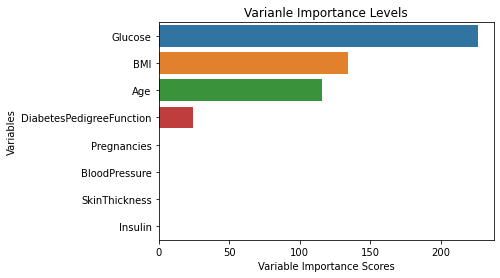

In [104]:
importance = pd.DataFrame({"variable_scores":lgbm_final_model.feature_importances_},index=X_train.columns).sort_values(by="variable_scores",ascending=False)

sns.barplot(data=importance,x=importance["variable_scores"],y=importance.index)
plt.title("Varianle Importance Levels")
plt.xlabel("Variable Importance Scores")
plt.ylabel("Variables")
plt.show();

# <font color="orange">Category Boosting (CatBoost) </font>
->> CatBoost is an another form of GBM that can handle categorical variables as automatically, fast and successful. <b>(Yandex)</b>
<br>
->> This is one of the good algorithm that can handle when we have important or more categorical variables.
<br>
->> In the methods, which are based on Tree methods, the data analysts can transform numerical values to categorical variables to make branching easier, and increasing tree performance.
<br>
->> Categorical Variable Support.
<br>
->> Fast and Scalable GPU Support.
<br>
->> More Successful Predictions.
<br>
->> Fast Train and Prediction.
<br>
->> The First open-source and successful Machine Learning work of Russia.

### <font color="red">Category Boosting (CatBoost) Model and Prediction </font>

In [105]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,roc_auc_score,roc_curve,classification_report,accuracy_score
from catboost import CatBoostClassifier

In [106]:
df=pd.read_csv("./csv_files/diabetes.csv")
y=df["Outcome"]
X=df.drop(columns=["Outcome"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [107]:
cat_model=CatBoostClassifier().fit(X_train,y_train,verbose=False)
predicted=cat_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7402597402597403


### <font color="red">Category Boosting (CatBoost) Model Tuning </font>

In [108]:
cat_model=CatBoostClassifier()
cat_params={"iterations":[200,500,100],"learning_rate":[0.1,0.03,0.01],"depth":[4,5,8]}
cat_cv_model=GridSearchCV(cat_model,param_grid=cat_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train,verbose=False)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [109]:
print(cat_cv_model.best_params_)

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}


In [110]:
# final model 

In [111]:
catb_final_model=CatBoostClassifier(iterations=200,learning_rate=0.01,depth=8).fit(X_train,y_train,verbose=False)
predicted=catb_final_model.predict(X_test)
print(accuracy_score(y_test,predicted))

0.7532467532467533


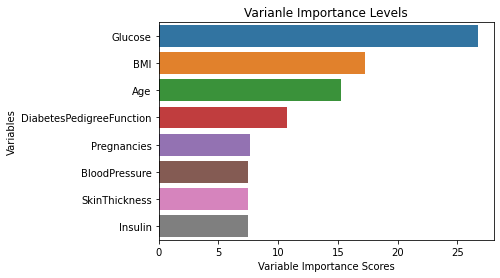

In [112]:
# Variabe importance
importance = pd.DataFrame({"variable_scores":catb_final_model.feature_importances_},index=X_train.columns).sort_values(by="variable_scores",ascending=False)

sns.barplot(data=importance,x=importance["variable_scores"],y=importance.index)
plt.title("Varianle Importance Levels")
plt.xlabel("Variable Importance Scores")
plt.ylabel("Variables")
plt.show();

# <font color="orange">Comparison of All Models</font>

### <font color="purple">Here, we will compare all tuned models what we did in this course</font>

In [175]:
models=[log_cv_model,
        knn_final_model,
        svc_final_model,
        mlp_final_model,
        cart_final_model,
        rf_final_model,
        gbm_final_model,
        xgb_final_model,
        catb_final_model,
        lgbm_final_model]

result=[]
results=pd.DataFrame(columns=["Models","Accuracy"])

for model in models:
    names=model.__class__.__name__
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    result=pd.DataFrame([[names,accuracy*100]],columns=["Models","Accuracy"])
    results=results.append(result)

In [176]:
results.sort_values(inplace=True,by="Accuracy",ascending=True)

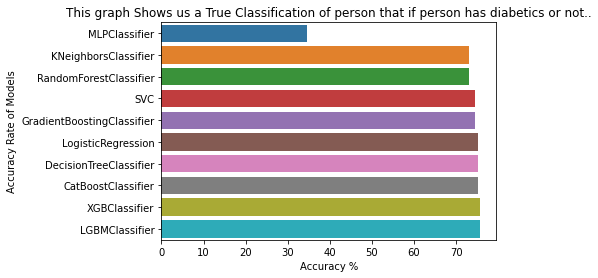

In [177]:
sns.barplot(x="Accuracy",y="Models",data=results)
plt.xlabel("Accuracy %")
plt.ylabel("Accuracy Rate of Models");
plt.title("This graph Shows us a True Classification of person that if person has diabetics or not..")
plt.show();

### <font color="purple">What else can we do ?</font>
->> Variable Derivation / Creation
<br>
->> Variable Selection
<br>
->> Automatic ML (AutoML)
<br>
->> Model Deployment